# Introduction to Natural Language Processing: Assignment 1

In this assignment we'll practice word operations and text classifications.

- Please comment your code
- You can use built-in Python packages, scikit-learn and Pandas.
- Submissions are due **on Tuesdays at 23:59** and should be submitted **ONLY** on eCampus: **Assignmnets >> Student Submissions >> Assignment 1 (Deadline: 05.11.2024, at 23:59)**
- Name the file aproppriately "Assignment_1_\<Your_Name\>.ipynb".
- Please submit **ONLY** the Jupyter Notebook file.
- Please use relative path; Your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = lemmatization-en.txt >> **DON'T use:** /Users/ComputerName/Username/Documents/.../lemmatization-en.txt

### Task 1.1 (2 points)

Write a function `extract_words_tokens(any_string)` that takes a string as input and returns two numbers:
1. num_words: The number of words in string
2. num_tokens: The number of tokens in string (Please use the character-based tokenization.)

**Hint:** The string can be a single word or a sentence and
 can contain some special charecters, such as: "!", ",", ":"

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_words_tokens(any_string):
    words = any_string.split()
    num_tokens = 0
    for word in words:
        num_tokens += len(word)
    num_words = len(words)
    return(print(any_string, ":", "num_words:", num_words, "and", "num_tokens:", num_tokens, "respectively"))

In [38]:
extract_words_tokens("   hello world!123")

   hello world!123 : num_words: 2 and num_tokens: 14 respectively


### Task 1.2 (4 points)

Write a function `lemmatize(any_string, file_name)` that takes as input any string and a file-name: `lemmatization-en.txt` (please download the file [here](https://github.com/michmech/lemmatization-lists/blob/master/lemmatization-en.txt). It's a tab separated corpus) and returns a dictionary with all words as keys and the lemma of the words as values.

**Hint:** To tokenize the string, please use the whitespace as the seperator. The string doesn't contain any special characters.

In [47]:
def lemmatize(any_string, file_name):
    lemma_dict = {}
    with open(file_name, 'r') as file:
        for line in file:
            lemma, word = line.strip().split('\t')
            if word not in lemma_dict:
                lemma_dict[word] = lemma
    words = any_string.split()
    dictionary_of_lemmatized_words = {word: lemma_dict.get(word, word) for word in words}
    return(print(dictionary_of_lemmatized_words))

In [48]:
lemmatize("I played badminton today", "lemmatization-en.txt")

{'I': 'I', 'played': 'play', 'badminton': 'badminton', 'today': 'today'}


### Task 2 (1 point)

Create a DataFrame using the `polarity.txt` file and give name to the columns appropriately. (e.g., "Text", "Label")

In [1]:
#here comes your code
import pandas as pd
df = pd.read_csv('./polarity.txt', sep='\t', header=None)
df.columns = ['text', 'label']
df

,text,label
0,every now and then a movie comes along from a ...,pos
1,"mtv films' _election , a high school comedy st...",pos
2,did anybody know this film existed a week befo...,pos
3,the plot is deceptively simple .,pos
4,george washington carver high school is having...,pos
...,...,...
69,it also wrapped production two years ago and h...,neg
70,whatever . . . skip,neg
71,it !,neg
72,where's joblo coming from ?,neg


### Task 2.1 (2 point)

Create a new column for the DataFrame that contains labels converted to numerical values instead of strings using the function: `apply()` and drop the original column afterwards.

Hint: The numarical values can be any meaningful values, e.g., pos >> 1 and neg >> 0

In [2]:
# here comes your code
df['numerical_label'] = df['label'].map({'pos': 1, 'neg': 0})
df.drop('label', axis=1, inplace=True)

In [3]:
df

,text,numerical_label
0,every now and then a movie comes along from a ...,1
1,"mtv films' _election , a high school comedy st...",1
2,did anybody know this film existed a week befo...,1
3,the plot is deceptively simple .,1
4,george washington carver high school is having...,1
...,...,...
69,it also wrapped production two years ago and h...,0
70,whatever . . . skip,0
71,it !,0
72,where's joblo coming from ?,0


### Task 3 (7 points)

Write a function `create_count_and_probability` that takes a file (`corpus.txt`) as input and returns a csv file as output containing three columns:
1. Text
2. Count_Vector
3. Probability

Example:

For the line: `This document is the second document.`

The row in the csv file should contain:
`This document is the second document.`   `[0,2,0,1,0,1,1,0,1]`   `[1/6, 2/6, 1/6, 1/6, 1/6, 2/6]`

**Note**:

1. You should define your own function and not use e.g., CountVectorizer() which gives you the `count vector`, directly.

2. You can either use the whitespace in `split` as the seperator or use the `Regular Expression (re)` to extract the words, as follows:

```
import re
TEXT = "Hey, - How are you doing today!?"
words_list = re.findall(r"[\w']+", TEXT)
print(words_list)
```

3. To count the words, you can use e.g., the library: `collections`, more specifically `Counter`.

4. Please don't upload the output file. Your function should generate the file.

In [4]:
import re
from collections import Counter
import pandas as pd

def create_count_and_probability(file_name):
    with open(file_name, 'r') as file:
        text = file.readlines()
    csv_file = []
    og_texts = text.copy()
    text = [re.findall(r"[\w']+", line.lower()) for line in text]
    unique_words = []
    for i in text:
        unique_words.extend(i)
    for og_text, words in zip(og_texts,text):
        unique_words = dict.fromkeys(unique_words, 0)
        for word in words:
            unique_words[word.lower()] += 1
        total_words = len(words)
        count_vector = unique_words.values()
        probability = []
        for word, count in unique_words.items():
            if count == 0: 
                continue
            probability.append(count / total_words)
        csv_file.append([og_text, count_vector, probability])
    csv_file = pd.DataFrame(csv_file, columns=['text', 'count_vector', 'probability'])
    csv_file.to_csv('output.csv')
    return csv_file
create_count_and_probability('./corpus.txt')

,text,count_vector,probability
0,This is the first document.\n,"(1, 1, 1, 1, 1, 0, 0, 0, 0)","[0.2, 0.2, 0.2, 0.2, 0.2]"
1,This document is the second document.\n,"(1, 1, 1, 0, 2, 1, 0, 0, 0)","[0.16666666666666666, 0.16666666666666666, 0.1..."
2,And this is the third one.\n,"(1, 1, 1, 0, 0, 0, 1, 1, 1)","[0.16666666666666666, 0.16666666666666666, 0.1..."
3,Is this the first document?,"(1, 1, 1, 1, 1, 0, 0, 0, 0)","[0.2, 0.2, 0.2, 0.2, 0.2]"


### Task 4 (8 points)

The goal of this task is to train and test classifiers provided in scikit-learn, using two datasets `rural.txt` and `science.txt`.

a) Each file (rural and science) contains sentence-wise documents. You should create a dataframe containing two columns: "Document" and " Class", as shown below. This dataframe will be used later as input for the vectorizer.

|Document                             |Class |
| ------------------------------------|----- |
|PM denies knowledge of AWB kickbacks | rural |
|The crocodile ancestor fossil, found...| science |


b) Remove stop words from the data and create two separate plots showing word frequency for documents in each label.

c) Split the data into train (70%) and test (30%) sets and use the following vectorization techniquess to train the two classifiers provided by scikit-learn:

- one-hot-encoding
- count vectorization

Classifiers:
- naive_bayes.GaussianNB()
- LogisticRegression()

**Hints:**
1. The Gaussian NB Classifier takes a dense matrix as input and the output of the vectorizer is a sparse matrix. Use my_matrix.toarray() for this conversion.
2. You can play around with various parameters in both the count-vectorizer and the classifier to get a better performance in terms of the accuracy. (In the exercise, we will discuss the accuracy of your model.)

In [5]:
# Here comes your code
#a
import pandas as pd
def create_data_frame(file_name):
    with open(f'./{file_name}.txt', 'r') as file:
        text = file.readlines()
    df = pd.DataFrame(text, columns=['text'])
    df['label'] = file_name
    return df
df1 = create_data_frame('rural')
df2 = create_data_frame('science')
df  = pd.concat([df1, df2],axis = 0)

In [9]:
df1

,text,label
0,PM denies knowledge of AWB kickbacks\n,rural
1,The Prime Minister has denied he knew AWB was ...,rural
2,Letters from John Howard and Deputy Prime Mini...,rural
3,In one of the letters Mr Howard asks AWB manag...,rural
4,The Opposition's Gavan O'Connor says the lette...,rural
...,...,...
544,Hindmarsh mayor Darryl Argall says the taskfor...,rural
545,Dairy companies compete for suppliers\n,rural
546,Competition for milk suppliers is intensifying...,rural
547,"After years of dismal prices, milk company Fon...",rural


In [8]:
print(df1.shape,df2.shape,df.shape)

(549, 2) (573, 2) (1122, 2)


In [13]:
#b
#remove stopword from the dataframe
from sklearn.feature_extraction.text import CountVectorizer

def remove_stopwords(dataframe):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(dataframe['text'])
    dataframe['text'] = vectorizer.inverse_transform(X)
    return dataframe
df_no_stopwords = remove_stopwords(df.copy())
# get word frequency for each label
def get_word_frequency(dataframe,label):
    word_freq = {}
    for index, row in dataframe[dataframe['label']==label].iterrows():
        for word in row['text']:
            if word not in word_freq:
                word_freq[word] = 1
            else:
                word_freq[word] += 1
    return word_freq
wf_rural = get_word_frequency(df_no_stopwords.copy(),'rural')
wf_science = get_word_frequency(df_no_stopwords.copy(),'science')

In [12]:
df_no_stopwords

,text,label
0,"[pm, denies, knowledge, awb, kickbacks]",rural
1,"[awb, kickbacks, prime, minister, denied, knew...",rural
2,"[awb, prime, minister, letters, john, howard, ...",rural
3,"[awb, iraq, wheat, sales, letters, howard, mr,...",rural
4,"[awb, kickbacks, paying, iraq, opposition, gav...",rural
...,...,...
568,"[australian, university, dr, group, national, ...",science
569,"[says, best, used, available, 10, fuel, times,...",science
570,"[says, did, years, 10, technology, improvement...",science
571,"[says, quite, solar, pluto, kuiper, belt, miss...",science


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

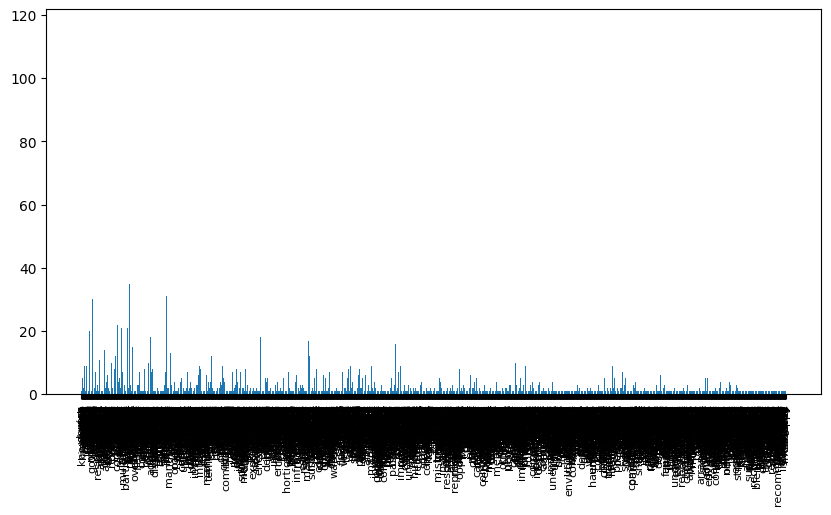

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(wf_rural.keys(), wf_rural.values())
plt.xticks(rotation=90, fontsize=8)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

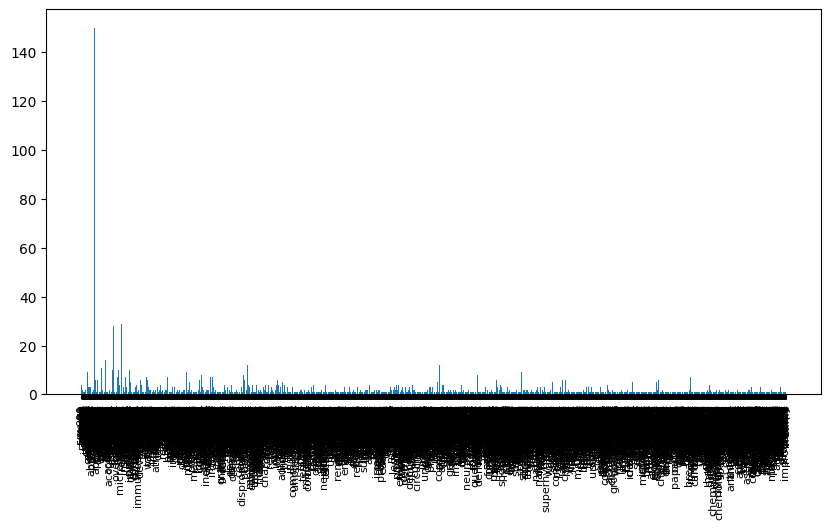

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(wf_science.keys(), wf_science.values())
plt.xticks(rotation=90, fontsize=8)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#c
# Split the data into train and test sets
train_df, test_df = train_test_split(df_no_stopwords, test_size=0.3, random_state=42)

# One-hot encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_one_hot = one_hot_encoder.fit_transform(train_df['text'].apply(lambda x: ' '.join(x)).values.reshape(-1, 1))
X_test_one_hot = one_hot_encoder.transform(test_df['text'].apply(lambda x: ' '.join(x)).values.reshape(-1, 1))

# Count vectorization
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(train_df['text'].apply(lambda x: ' '.join(x)))
X_test_count = count_vectorizer.transform(test_df['text'].apply(lambda x: ' '.join(x)))

# Convert labels to numerical values
y_train = train_df['label'].map({'rural': 0, 'science': 1}).values
y_test = test_df['label'].map({'rural': 0, 'science': 1}).values

# Train and test GaussianNB with one-hot encoding
gnb = GaussianNB()
gnb.fit(X_train_one_hot, y_train)
y_pred_gnb_one_hot = gnb.predict(X_test_one_hot)
accuracy_gnb_one_hot = accuracy_score(y_test, y_pred_gnb_one_hot)

# Train and test LogisticRegression with one-hot encoding
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_one_hot, y_train)
y_pred_lr_one_hot = lr.predict(X_test_one_hot)
accuracy_lr_one_hot = accuracy_score(y_test, y_pred_lr_one_hot)

# Train and test GaussianNB with count vectorization
gnb.fit(X_train_count.toarray(), y_train)
y_pred_gnb_count = gnb.predict(X_test_count.toarray())
accuracy_gnb_count = accuracy_score(y_test, y_pred_gnb_count)

# Train and test LogisticRegression with count vectorization
lr.fit(X_train_count, y_train)
y_pred_lr_count = lr.predict(X_test_count)
accuracy_lr_count = accuracy_score(y_test, y_pred_lr_count)

# Print the accuracies
print(f'Accuracy of GaussianNB with one-hot encoding: {accuracy_gnb_one_hot}')
print(f'Accuracy of LogisticRegression with one-hot encoding: {accuracy_lr_one_hot}')
print(f'Accuracy of GaussianNB with count vectorization: {accuracy_gnb_count}')
print(f'Accuracy of LogisticRegression with count vectorization: {accuracy_lr_count}')

Accuracy of GaussianNB with one-hot encoding: 0.516320474777448
Accuracy of LogisticRegression with one-hot encoding: 0.4836795252225519
Accuracy of GaussianNB with count vectorization: 0.9169139465875371
Accuracy of LogisticRegression with count vectorization: 0.8931750741839762
